In [1]:
import numpy as np
import pandas as pd
import scipy.io

# Jiang et al 2023

In [61]:
raw_data = pd.read_csv("data/raw_data.csv")
private_signals = scipy.io.loadmat('data/game_design.mat')['chosen_signals']

In [38]:
columns = ['sid', 'trial', 'network', 'stage', 'sum private', 'who', 'color', 'degree', 'RD', 'action']
dfs = []
for sid in raw_data['SID'].unique():
    print(sid)
    for trial in raw_data.query('SID==@sid')['game_order'].unique():
        trialdata = raw_data.query('SID==@sid & game_order==@trial')
        network = trialdata['game_index'].unique()[0]
        private = 2*private_signals[network-1] - np.ones((7))
        sum_private = np.sum(private)
        for stage in range(4):
            if stage==0:
                color = trialdata.query("stage==0 & event_type==2")['color'].to_numpy()[0]
                degree = trialdata.query("stage==1 & event_type==5")['degree'].to_numpy()[0]
                RD = 0
                who = trialdata.query("stage==1 & event_type==5")['observed_node'].to_numpy()[0]
                act = trialdata.query("stage==0 & event_type==4")['color'].to_numpy()[0]
                df = pd.DataFrame([[sid, trial, network, stage, sum_private, who, 2*color-1, degree, RD, 2*act-1]], columns=columns)
                dfs.append(df)
            else:
                stagedata = trialdata.query("stage==@stage")
                whos = stagedata.query("event_type==6")['observed_node'].to_numpy()
                for who in whos:
                    whodata = stagedata.query("observed_node==@who & event_type==6")
                    color = whodata['color'].to_numpy()[0]
                    degree = whodata['degree'].to_numpy()[0]
                    RD = whodata["neighbors' RD"].to_numpy()[0]
                    act = stagedata.query("event_type==4")['color'].unique()[0]
                    df = pd.DataFrame([[sid, trial, network, stage, sum_private, who, 2*color-1, degree, RD, 2*act-1]], columns=columns)
                    dfs.append(df)
        print(trial, network, sum_private, 2*act-1)
        
data = pd.concat(dfs, ignore_index=True)
data.to_pickle("data/human2.pkl")

1
1 9 -1.0 -1
2 15 1.0 -1
3 37 -1.0 -1
4 31 1.0 -1
5 12 1.0 1
6 28 1.0 1
7 16 3.0 1
8 18 1.0 -1
9 14 1.0 1
10 43 3.0 1
11 24 1.0 -1
12 8 1.0 1
13 29 1.0 -1
14 39 1.0 -1
15 42 -3.0 -1
16 17 -1.0 1
17 38 1.0 -1
18 4 -3.0 -1
19 19 -1.0 -1
20 13 1.0 -1
21 41 -1.0 1
22 40 1.0 -1
23 7 1.0 1
24 34 1.0 1
25 32 -1.0 -1
26 5 -1.0 -1
27 26 5.0 1
28 23 -1.0 -1
29 22 1.0 -1
30 36 -1.0 1
31 33 -1.0 1
32 25 -1.0 1
33 10 5.0 1
34 20 1.0 1
35 27 -1.0 1
36 11 -3.0 -1
37 21 -1.0 -1
38 35 -1.0 -1
39 30 3.0 1
40 6 1.0 -1
2
1 9 -1.0 -1
2 15 1.0 -1
3 37 -1.0 -1
4 31 1.0 -1
5 12 1.0 -1
6 28 1.0 -1
7 16 3.0 1
8 18 1.0 -1
9 14 1.0 1
10 43 3.0 1
11 24 1.0 -1
12 8 1.0 -1
13 29 1.0 -1
14 39 1.0 1
15 42 -3.0 -1
16 17 -1.0 1
17 38 1.0 -1
18 4 -3.0 -1
19 19 -1.0 1
20 13 1.0 -1
21 41 -1.0 1
22 40 1.0 -1
23 7 1.0 -1
24 34 1.0 1
25 32 -1.0 -1
26 5 -1.0 1
27 26 5.0 1
28 23 -1.0 1
29 22 1.0 -1
30 36 -1.0 1
31 33 -1.0 1
32 25 -1.0 1
33 10 5.0 1
34 20 1.0 1
35 27 -1.0 1
36 11 -3.0 -1
37 21 -1.0 -1
38 35 -1.0 1
39 30 3.0 1
4

KeyboardInterrupt: 

In [2]:
data = pd.read_pickle("data/human2.pkl")

In [29]:
data.query("sid==1")['trial'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])

In [30]:
data.query("sid==1")['network'].unique()

array([ 9, 15, 37, 31, 12, 28, 16, 18, 14, 43, 24,  8, 29, 39, 42, 17, 38,
        4, 19, 13, 41, 40,  7, 34, 32,  5, 26, 23, 22, 36, 33, 25, 10, 20,
       27, 11, 21, 35, 30,  6])

In [51]:
data.query("`sum private` in [-3.0, -5.0, 3.0, 5.0]")['network'].unique()

array([16, 43, 42,  4, 26, 10, 11, 30])

In [52]:
data.query("`sum private` not in [-3.0, -5.0, 3.0, 5.0]")['network'].unique()

array([ 9, 15, 37, 31, 12, 28, 18, 14, 24,  8, 29, 39, 17, 38, 19, 13, 41,
       40,  7, 34, 32,  5, 23, 22, 36, 33, 25, 20, 27, 21, 35,  6])

In [59]:
scipy.io.loadmat('data/game_design.mat')['chosen_graphs'][:,:,4]

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0]], dtype=uint8)

In [62]:
scipy.io.loadmat('data/game_design.mat')['chosen_signals'][4]

array([0, 0, 0, 1, 1, 0, 1], dtype=uint8)

In [64]:
data.query("network==4")

,sid,trial,network,stage,sum private,who,color,degree,RD,action
161,1,18,4,0,-3.0,2,-1,2,0.00000,-1
162,1,18,4,1,-3.0,5,-1,2,0.28571,-1
163,1,18,4,1,-3.0,7,-1,3,0.42857,-1
164,1,18,4,2,-3.0,7,-1,3,0.42857,-1
165,1,18,4,2,-3.0,5,-1,2,0.28571,-1
...,...,...,...,...,...,...,...,...,...,...
86369,224,1,4,1,-3.0,4,1,2,0.28571,-1
86370,224,1,4,2,-3.0,4,-1,2,0.28571,-1
86371,224,1,4,2,-3.0,6,-1,3,0.42857,-1
86372,224,1,4,3,-3.0,6,-1,3,0.42857,-1


# Prat-Carrabin and Woodford 2024

In [4]:
raw_data = pd.read_csv("data/carrabin_data.csv")

In [6]:
raw_data

,subject_id,sequence_id,probability,sample_id,outcome,response,payoff,cumul_outcome
0,1,1,0.176952,1,1.0,0.750,-21.41,1.0
1,1,1,0.176952,2,0.0,0.500,-2.37,1.0
2,1,1,0.176952,3,0.0,0.250,6.05,1.0
3,1,1,0.176952,4,0.0,0.201,6.45,1.0
4,1,1,0.176952,5,0.0,0.100,6.00,1.0
...,...,...,...,...,...,...,...,...
20750,21,200,0.990138,1,1.0,0.561,-9.15,1.0
20751,21,200,0.990138,2,1.0,0.656,-2.99,2.0
20752,21,200,0.990138,3,1.0,0.754,1.76,3.0
20753,21,200,0.990138,4,1.0,0.846,4.73,4.0


In [24]:
# columns = ['sid', 'trial', 'stage', 'color', 'response', 'sum color', 'probability']
columns = ['type', 'sid', 'trial', 'stage', 'color', 'response']
dfs = []
for sid in raw_data['subject_id'].unique():
    for trial in raw_data.query('subject_id==@sid')['sequence_id'].unique():
        sum_color = 0
        for stage in raw_data.query('subject_id==@sid & sequence_id==@trial')['sample_id'].unique():
            stagedata = raw_data.query('subject_id==@sid & sequence_id==@trial & sample_id==@stage')
            color = int(2*stagedata['outcome'].to_numpy()[0]-1)
            response = 2*stagedata['response'].to_numpy()[0]-1
            # sum_color += color
            # probability = stagedata['probability'].to_numpy()[0]
            # df = pd.DataFrame([[sid, trial, stage, color, response, sum_color, probability]], columns=columns)
            df = pd.DataFrame([['human', sid, trial, stage, color, response]], columns=columns)
            dfs.append(df)
data = pd.concat(dfs, ignore_index=True)
data.to_pickle("data/carrabin.pkl")

In [14]:
data

,sid,trial,stage,color,response
0,1,1,1,1,0.500
1,1,1,2,-1,0.000
2,1,1,3,-1,-0.500
3,1,1,4,-1,-0.598
4,1,1,5,-1,-0.800
...,...,...,...,...,...
20750,21,200,1,1,0.122
20751,21,200,2,1,0.312
20752,21,200,3,1,0.508
20753,21,200,4,1,0.692


In [23]:
data.query("sid==1 & trial==1 & stage<=4 & color==1")['color'].size

1

<Axes: xlabel='probability', ylabel='response'>

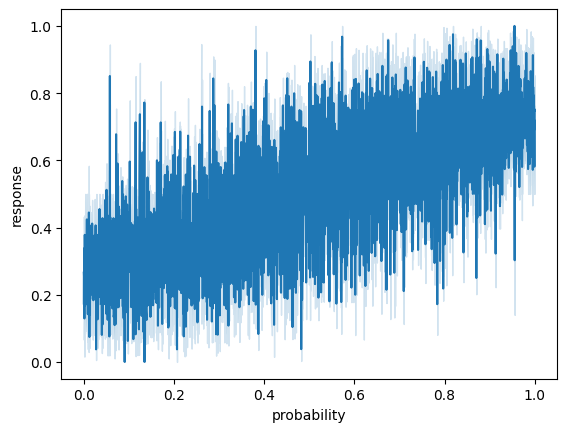

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

sns.regplot(data=raw_data, x='probability', y='response', ax=ax, bins=xbins)

In [8]:
raw_data['probability'].unique().size

4151